In [1]:
%matplotlib inline
from grale.constants import *
import grale.images as images
import grale.plotutil as plotutil
import grale.lenses as lenses
import grale.cosmology as cosmology
import grale.feedback as feedback
import matplotlib.pyplot as plt
import numpy as np
import pprint
import copy

plotutil.setDefaultAngularUnit(ANGLE_ARCSEC)
feedback.setDefaultFeedback("notebook")

V = lambda x, y: np.array([x,y], dtype=np.double)

Let's create a GRALE model for the LensTool model in 
[test_source.par](lenstool_test/example_with_sources/test_source.par). This file comes from the
'example_with_sources' example from the [LensTool 7.1.1](https://projets.lam.fr/projects/lenstool/wiki) source code.

In [2]:
lens, zd, cosm = lenses.createLensFromLenstoolFile("./lenstool_test/example_with_sources/test_source.par")
cosmology.setDefaultCosmology(cosm)

Text(value='')

FloatProgress(value=0.0)

Text(value='')

FloatProgress(value=0.0)

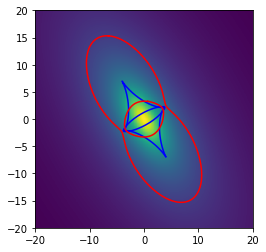

In [3]:
# Let's visualize the density and critical lines/caustics for a source redshift of z=1
li = plotutil.LensInfo(lens, size=40*ANGLE_ARCSEC, zd=zd, zs=1)
plotutil.plotImagePlane(li, bgRgb=(0,0,0,0))
plotutil.plotDensity(li)

In [4]:
# The first five lines of this file are
open("./lenstool_test/example_with_sources/test_source.par").readlines()[:5]

['runmode\n',
 '\treference 3 133.69358 -1.36032\n',
 '\timage     0 image.cat\n',
 '\tsource    1 source_wcs.cat\n',
 '\tmass      3 100 0.4 mass.fits\n']

In [5]:
# This shows the center coordinates that are used in the specification of the
# sources
centerRaDec = V(133.69358, -1.36032)*ANGLE_DEGREE

In [6]:
# Let's load the point source information. The coordinates are in RA/dec, so 
# we need to convert them to angles relative to the central point above.
#
# To use the same coordinates as LensTool does, we subsequently need to flip
# the X-coordinate
sources = { }
for l in open("./lenstool_test/example_with_sources/source_wcs.cat"):
    if l.startswith("#"):
        continue
        
    parts = l.strip().split()
    name, ra, dec, z = parts[0], float(parts[1])*ANGLE_DEGREE, float(parts[2])*ANGLE_DEGREE, float(parts[6])
    
    x, y = images.centerOnPosition([ra, dec], centerRaDec)
    sources[name] = { "beta": V(-x, y), "z": z }
    
for n in sources:
    print(n, sources[n]["beta"]/ANGLE_ARCSEC)

a1 [-1.25964128  2.37599991]
a2 [-0.9357338  -0.97200005]
a3 [ 2.44730923 -2.55600034]


In [7]:
# We can compare this with the 'source.dat' file that's generated when running LensTool:
print(open("lenstool_test/example_with_sources/source.dat").read())

#REFERENCE 3 133.6935800 -1.3603200
a1 -1.2596449 2.3760000 0.300000 0.300000 0.00000 1.0000 0.00 
a2 -0.9357362 -0.9720000 0.300000 0.300000 0.00000 1.0000 0.00 
a3 2.4473101 -2.5560000 0.300000 0.300000 0.00000 1.0000 0.00 



Text(value='')

Text(value='')

Text(value='')

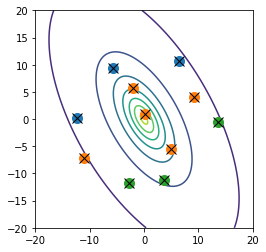

In [8]:
# Here, we'll make a plot consisting of two sets of points:
#  - first, we calculate the image plane positions (thetas) for each of these 
#    source positions using GRALE, and plot them as filled circles (with a 
#    different color for each source)
#  - then, we plot the image positions that were calculated using LensTool,
#    and which were stored in 'image.all' as black crosses.

# Let's visualize the density and critical lines/caustics for a source redshift of z=1
plotutil.plotDensityContours(li)
for name in sources:
    src = sources[name]
    li.setSourceRedshift(src["z"])
    ip = li.getImagePlane()
    thetas = np.array(ip.traceBeta(src["beta"]))/ANGLE_ARCSEC
    plt.plot(thetas[:,0], thetas[:,1], 'o', markersize=10)

for l in open("./lenstool_test/example_with_sources/image.all"):
    if l.startswith("#"):
        continue
    
    parts = l.strip().split()
    name, x, y = parts[0], float(parts[1]), float(parts[2])
    plt.plot([x], [y], 'x', markersize=10, mec='black')
    
plt.gca().set_aspect("equal")
